<a href="https://colab.research.google.com/github/kamilamyslinska/pix_to_pix-pytorch-/blob/main/pix_to_pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install diffusers["torch"]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 604.0/604.0 KB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 25.5 MB/s eta 0:00:00


In [5]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 97.7 MB/s eta 0:00:00


In [6]:
pip install --upgrade diffusers transformers scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 13.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [7]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline

In [8]:
model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

In [36]:
url = "https://static.amazon.jobs/locations/208/thumbnails/lodz543.jpg?1553525589"

In [37]:
def download_image(url):
    image = PIL.Image.open(requests.get(url, stream=True).raw)
    image = PIL.ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image


In [38]:
image = download_image(url)


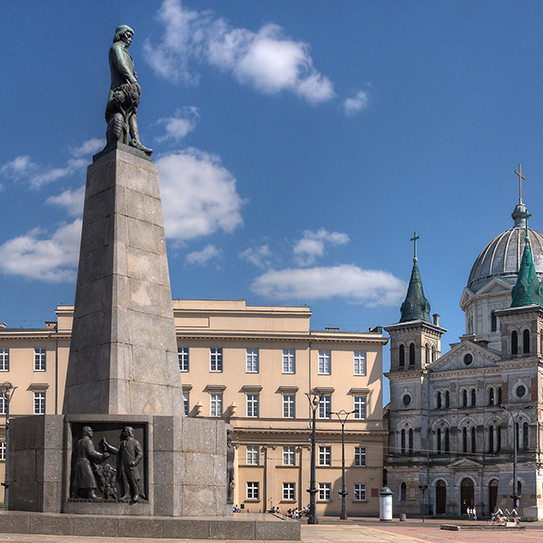

In [39]:
image

In [77]:
prompt = "make the white buildings with rainbow"
edit = pipe(prompt, image=image, num_inference_steps=25, image_guidance_scale=1.5, guidance_scale=12).images[0]


  0%|          | 0/25 [00:00<?, ?it/s]

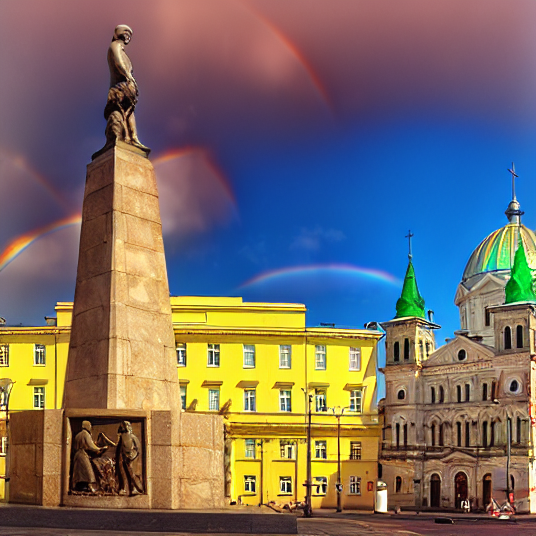

In [78]:
edit

  0%|          | 0/20 [00:00<?, ?it/s]

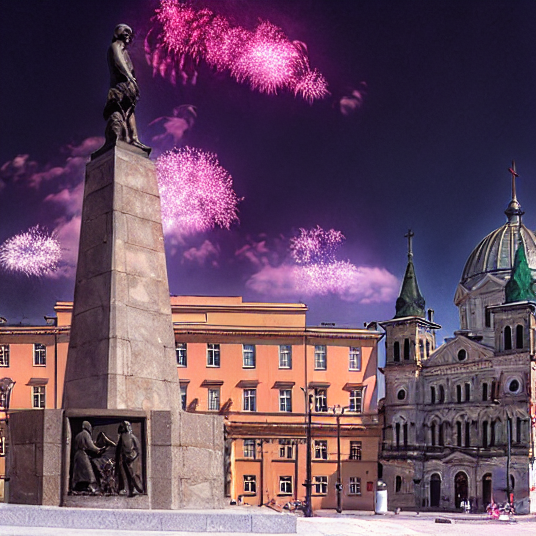

In [81]:
prompt = "make snowy with lots of fireworks"
pipe(prompt, image=image, num_inference_steps=20, image_guidance_scale=1.5, guidance_scale=7).images[0]